In [1]:
# importing necessary libraries to use:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [4]:
# reading the data into the dataframe
df = pd.read_csv('eda_data.csv')

In [5]:
df.head()

,Unnamed: 0,Job Title,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,...,22,1,0,0,0,1,data scientist,na,2728,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Rating             742 non-null    float64
 3   Location           742 non-null    object 
 4   Headquarters       742 non-null    object 
 5   Size               742 non-null    object 
 6   Founded            742 non-null    int64  
 7   Type of ownership  742 non-null    object 
 8   Industry           742 non-null    object 
 9   Sector             742 non-null    object 
 10  Revenue            742 non-null    object 
 11  Competitors        742 non-null    object 
 12  employer_provided  742 non-null    int64  
 13  hourly             742 non-null    int64  
 14  min_salary         742 non-null    int64  
 15  max_salary         742 non-null    int64  
 16  avg_salary         742 non

In [7]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Rating', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'employer_provided', 'hourly', 'min_salary',
       'max_salary', 'avg_salary', 'company_name', 'job_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

## modeling steps

In [ ]:
        # choose relevant columns for the modeling
        # get dummy data
        # train test split
        # multiple linear regression
        # lasso regression
        # random forest
        # tune models GridsearchCV
        # test esembles

#### choose relevant columns for the modeling

In [8]:
# viewing all the columns:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Rating', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'employer_provided', 'hourly', 'min_salary',
       'max_salary', 'avg_salary', 'company_name', 'job_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [9]:
# choose relevant columns for the modeling:
df_model = df[['avg_salary','Rating','Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
             'num_comp','hourly', 'employer_provided','job_state', 'same_state', 'age', 'python_yn',
             'spark','aws', 'excel','job_simp', 'seniority', 'desc_len']]

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_salary         742 non-null    float64
 1   Rating             742 non-null    float64
 2   Size               742 non-null    object 
 3   Type of ownership  742 non-null    object 
 4   Industry           742 non-null    object 
 5   Sector             742 non-null    object 
 6   Revenue            742 non-null    object 
 7   num_comp           742 non-null    int64  
 8   hourly             742 non-null    int64  
 9   employer_provided  742 non-null    int64  
 10  job_state          742 non-null    object 
 11  same_state         742 non-null    int64  
 12  age                742 non-null    int64  
 13  python_yn          742 non-null    int64  
 14  spark              742 non-null    int64  
 15  aws                742 non-null    int64  
 16  excel              742 non

In [15]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,employer_provided,job_state,same_state,age,python_yn,spark,aws,excel,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,47,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,36,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,10,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,55,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,22,1,0,0,1,data scientist,na,2728


#### get dummy data

In [11]:
# geting the dummy data to complete the columns:
df_dum = pd.get_dummies(df_model)

In [14]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_data analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0


#### train test split

In [16]:
# train test spliting:
#from sklearn.model_selection import train_test_split
x = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary

In [17]:
# spliting the train and test randomly:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### multiple linear regression

In [18]:
# using multiple linear regression:
#import statsmodels.api as sm
x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.15e-94
Time:                        17:04:49   Log-Likelihood:                -3311.1
No. Observations:                 742   AIC:                             6910.
Df Residuals:                     598   BIC:                             7574.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.4630      6.732      6.605      0.000      31.242      57.684
Rating                                                3.5916      1.937      1.854      0.064      -0.213       7.397
num_comp                                              2.3525      0.875      2.689      0.007       0.634       4.071
hourly                                              -36.4060      9.176     -3.968      0.000     -54.426     -18.386
employer_provided                                    31.4122     11.525      2.726      0.007       8.777      54.047
same_state                                            2.6791      2.627      1.020      0.308      -2.480       7.838
age                                                   0.0342      0.030      1.138      0.256      -0.025       0.093
python_yn                                             8.0558      2.525      3.190      0.001       3.097      13.015
spark                                                -0.4946      2.922     -0.169      0.866      -6.233       5.244
aws                                                   1.1136      2.736      0.407      0.684      -4.260       6.487
excel                                                -0.5012      2.270     -0.221      0.825      -4.960       3.957
desc_len                                             -0.0002      0.001     -0.235      0.814      -0.002       0.001
Size_-1                                              13.6652      8.630      1.583      0.114      -3.284      30.614
Size_1 to 50 employees                                1.2839      6.503      0.197      0.844     -11.487      14.055
Size_10000+ employees                                -3.0474      5.805     -0.525      0.600     -14.447       8.352
Size_1001 to 5000 employees                           6.1683      3.879      1.590      0.112      -1.449      13.786
Size_201 to 500 employees                             2.5013      3.879      0.645      0.519      -5.117      10.120
Size_5001 to 10000 employees                         -3.8841      5.441     -0.714      0.476     -14.570       6.802
Size_501 to 1000 employees                            2.3822      4.063      0.586      0.558      -5.597      10.361
Size_51 to 200 employees                              4.4150      4.425      0.998      0.319      -4.275      13.105
Size_Unknown                                         20.9785     13.993      1.499      0.134      -6.504      48.461
Type of ownership_-1                                 13.6652      8.630      1.583      0.114      -3.284      30.614
Type of ownership_College / University                6.4367     17.741      0.363      0.717     -28.405      41.278
Type of ownersh

In [19]:
# linear model:
lm = LinearRegression()
lm.fit(x_train, y_train)

np.mean(cross_val_score(lm,x_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-20.859074887532643

#### lasso regression

In [20]:
# lasso regression:
#from sklearn.linear_model import LinearRegression, Lasso

lm_l = Lasso(alpha=.13)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-19.27445273450647

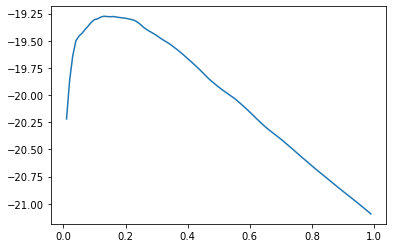

In [21]:
# tunning the alpha:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)))
plt.plot(alpha,error);  

#### random forest

In [22]:
# using the random forest model:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,x_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-15.0519645695534

#### tune models GridsearchCV

In [23]:
# tunning the models GridsearchCV:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error', cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [24]:
# to determine the best score and estimator
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=270)

#### test esembles

In [25]:
# using the test dataset to predict:
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [26]:
# comparing the linear random forest models:
#from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

11.1560216256525

In [27]:
# get the mean absolute error score:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.253460234436044

#### Putting the model into production in API

In [28]:
# importing the production library
import pickle
pickl = {'model':gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb") )

In [29]:
# model file name
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
model.predict(x_test.iloc[1,:].values.reshape(1,-1))

array([53.9037037])